In [7]:
import xgboost as xgb
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance

In [2]:
!pip install xgboost

    100% |████████████████████████████████| 142.8MB 324kB/s 


In [5]:
data = pd.read_sas('/home/guangya/Downloads/wnv_2245new.sas7bdat') 

In [247]:
data.columns

Index(['hexid', 'Input_FID', 'tempc', 'preci', 'yr', 'weeks', 'yrweeks',
       'yrwksfid', 'templag1', 'templag2', 'templag3', 'templag4', 'precilag1',
       'precilag2', 'precilag3', 'precilag4', 'wnvbinary', 'mirmean', 'year',
       'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4', 'totpop', 'whitepct',
       'blackpct', 'asianpct', 'hispanicpct', 'Income', 'owpct', 'dospct',
       'dlipct', 'dmipct', 'dhipct', 'blpct', 'dfpct', 'efpct', 'mfpct',
       'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct', 'ehwpct',
       'yr_hexid', 'Jantemp', 'PopYesNo', 'hpctpreww', 'hpctpostww',
       'hpct7089', 'hpctpost90', 'income1'],
      dtype='object')

In [297]:
# data.groupby('hexid').sum()['wnvbinary'] > 0

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(trainY_sel),
                                             trainY_sel))

w_array = np.ones(trainY_sel.shape[0], dtype = 'float')
for i, val in enumerate(trainY_sel):
    w_array[i] = class_weights[int(val)]

In [302]:
x = data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).values

In [245]:
x_selected = data[data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year'])values
y = data['wnvbinary'].values 
y_selected = y

SyntaxError: invalid syntax (<ipython-input-245-983cf982421e>, line 2)

In [303]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, shuffle = True) # CV

In [10]:
trainX_sel, testX_sel, trainY_sel, testY_sel = train_test_split(x_selected, y_selected, test_size = 0.2, shuffle = True) # CV

In [235]:
dtrain = xgb.DMatrix(trainX_sel, trainY_sel,weight=w_array)
dtest = xgb.DMatrix(testX_sel,testY_sel,weight= w_array)


In [262]:
param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree', 'base_score':0.5,'eval_metric' : ['auc','logloss']}

# the rest of settings are the same
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 500
# training and evaluation
bst = xgb.train(param, dtrain, num_round, watchlist)
preds = bst.predict(dtest)
labels = dtest.get_label()

[0]	eval-auc:0.861386	eval-logloss:0.556625	train-auc:0.904001	train-logloss:0.553077
[1]	eval-auc:0.879591	eval-logloss:0.487695	train-auc:0.915014	train-logloss:0.472326
[2]	eval-auc:0.887311	eval-logloss:0.441448	train-auc:0.924434	train-logloss:0.418739
[3]	eval-auc:0.89161	eval-logloss:0.409678	train-auc:0.929621	train-logloss:0.380921
[4]	eval-auc:0.892389	eval-logloss:0.390167	train-auc:0.932043	train-logloss:0.356889
[5]	eval-auc:0.892078	eval-logloss:0.376421	train-auc:0.935629	train-logloss:0.333832
[6]	eval-auc:0.890252	eval-logloss:0.364727	train-auc:0.939895	train-logloss:0.316497
[7]	eval-auc:0.890513	eval-logloss:0.35676	train-auc:0.942526	train-logloss:0.304567
[8]	eval-auc:0.888912	eval-logloss:0.349723	train-auc:0.945987	train-logloss:0.29178
[9]	eval-auc:0.888471	eval-logloss:0.341498	train-auc:0.948363	train-logloss:0.285064
[10]	eval-auc:0.889478	eval-logloss:0.33343	train-auc:0.950396	train-logloss:0.277358
[11]	eval-auc:0.890758	eval-logloss:0.328383	train-auc:0.

In [273]:
dtrain = xgb.DMatrix(trainX_sel, trainY_sel)
dtest = xgb.DMatrix(testX_sel,testY_sel)

In [274]:
param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree', 'base_score':0.5,'eval_metric' : ['auc','logloss']}
# the rest of settings are the same
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 33
# training and evaluation
bst = xgb.train(param, dtrain, num_round, watchlist)
preds_unweighted = bst.predict(dtest)
labels_unweighted = dtest.get_label()

[0]	eval-auc:0.5	eval-logloss:0.438102	train-auc:0.5	train-logloss:0.437908
[1]	eval-auc:0.730742	eval-logloss:0.297405	train-auc:0.743389	train-logloss:0.297464
[2]	eval-auc:0.789807	eval-logloss:0.208697	train-auc:0.79665	train-logloss:0.208579
[3]	eval-auc:0.793375	eval-logloss:0.149466	train-auc:0.805552	train-logloss:0.149514
[4]	eval-auc:0.793366	eval-logloss:0.108603	train-auc:0.805708	train-logloss:0.108272
[5]	eval-auc:0.794861	eval-logloss:0.079686	train-auc:0.808899	train-logloss:0.079539
[6]	eval-auc:0.79557	eval-logloss:0.05907	train-auc:0.80986	train-logloss:0.058737
[7]	eval-auc:0.830642	eval-logloss:0.044193	train-auc:0.846089	train-logloss:0.043871
[8]	eval-auc:0.834362	eval-logloss:0.033405	train-auc:0.854807	train-logloss:0.033117
[9]	eval-auc:0.836534	eval-logloss:0.025561	train-auc:0.858855	train-logloss:0.025246
[10]	eval-auc:0.841313	eval-logloss:0.019859	train-auc:0.864115	train-logloss:0.019495
[11]	eval-auc:0.844446	eval-logloss:0.015698	train-auc:0.865698	tra

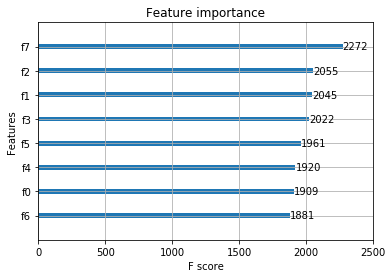

In [265]:
plot_importance(bst)

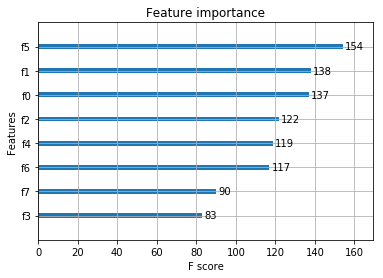

In [268]:
labels[np.where(preds  > 0.1)].sum()

8.0

In [269]:
len(preds[preds > 0.1])

829

In [277]:
len(preds[preds > 0.01])

7156

In [276]:
labels[np.where(preds  > 0.01)].sum()

34.0

In [278]:
preds.mean() * len(preds)

471.4612724655308

In [286]:
(labels == 1).sum()

199

In [287]:
labels_unweighted[np.where(preds_unweighted  > 0.1)].sum()

0.0

In [280]:
len(preds_unweighted[preds_unweighted > 0.1])

0

In [281]:
len(preds_unweighted[preds_unweighted > 0.01])

1078

In [282]:
labels_unweighted[np.where(preds_unweighted  > 0.01)].sum()

13.0

In [283]:
preds_unweighted.mean() * len(preds_unweighted)

181.2386857403908

In [285]:
(labels_unweighted == 1).sum()

199

In [307]:
dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX,testY)

In [308]:
param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree', 'base_score':0.5,'eval_metric' : ['auc','logloss']}
# the rest of settings are the same
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 50
# training and evaluation
bst = xgb.train(param, dtrain, num_round, watchlist)
preds_unweighted = bst.predict(dtest)
labels_unweighted = dtest.get_label()

[0]	eval-auc:0.5	eval-logloss:0.438079	train-auc:0.5	train-logloss:0.437914
[1]	eval-auc:0.693043	eval-logloss:0.297385	train-auc:0.726202	train-logloss:0.297495
[2]	eval-auc:0.751946	eval-logloss:0.208639	train-auc:0.788791	train-logloss:0.208526
[3]	eval-auc:0.752051	eval-logloss:0.149389	train-auc:0.795996	train-logloss:0.14952
[4]	eval-auc:0.748842	eval-logloss:0.108502	train-auc:0.812516	train-logloss:0.108272
[5]	eval-auc:0.791743	eval-logloss:0.079596	train-auc:0.847422	train-logloss:0.079562
[6]	eval-auc:0.797389	eval-logloss:0.058935	train-auc:0.85092	train-logloss:0.058771
[7]	eval-auc:0.803614	eval-logloss:0.04407	train-auc:0.856532	train-logloss:0.04388
[8]	eval-auc:0.816182	eval-logloss:0.033275	train-auc:0.866147	train-logloss:0.033134
[9]	eval-auc:0.81605	eval-logloss:0.025436	train-auc:0.868611	train-logloss:0.02525
[10]	eval-auc:0.826447	eval-logloss:0.0197	train-auc:0.88748	train-logloss:0.019488
[11]	eval-auc:0.831013	eval-logloss:0.015525	train-auc:0.892772	train-lo

<Figure size 3600x2160 with 0 Axes>

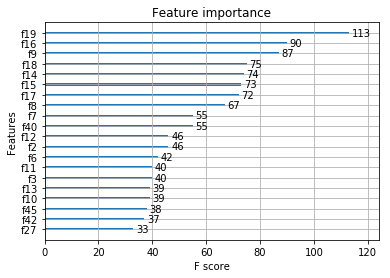

In [319]:
plt.figure(figsize = (50,30))
plot_importance(bst,max_num_features= 20)

In [320]:
temp = data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year'])

In [331]:
data.columns

Index(['hexid', 'Input_FID', 'tempc', 'preci', 'yr', 'weeks', 'yrweeks',
       'yrwksfid', 'templag1', 'templag2', 'templag3', 'templag4', 'precilag1',
       'precilag2', 'precilag3', 'precilag4', 'wnvbinary', 'mirmean', 'year',
       'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4', 'totpop', 'whitepct',
       'blackpct', 'asianpct', 'hispanicpct', 'Income', 'owpct', 'dospct',
       'dlipct', 'dmipct', 'dhipct', 'blpct', 'dfpct', 'efpct', 'mfpct',
       'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct', 'ehwpct',
       'yr_hexid', 'Jantemp', 'PopYesNo', 'hpctpreww', 'hpctpostww',
       'hpct7089', 'hpctpost90', 'income1'],
      dtype='object')

In [323]:
temp_val = temp[temp.columns[[19,16,9,18,14,15,17,8,7,40,12]]].values

In [330]:
temp.columns[[19,16,9,18,14,15,17,8,7,40,12]]

Index(['totpop', 'mirlag2', 'templag4', 'mirlag4', 'mirmean', 'mirlag1',
       'mirlag3', 'templag3', 'templag2', 'Jantemp', 'precilag3'],
      dtype='object')

In [324]:
trainX_b, testX_b, trainY_b, testY_b = train_test_split(temp_val, y, test_size = 0.2, shuffle = True) # CV

In [325]:
dtrain = xgb.DMatrix(trainX_b, trainY_b)
dtest = xgb.DMatrix(testX_b,testY_b)

In [327]:
param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree', 'base_score':0.5,'eval_metric' : ['auc','logloss']}
# the rest of settings are the same
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 37
# training and evaluation
bst = xgb.train(param, dtrain, num_round, watchlist)
preds_unweighted = bst.predict(dtest)
labels_unweighted = dtest.get_label()

[0]	eval-auc:0.5	eval-logloss:0.438036	train-auc:0.5	train-logloss:0.437924
[1]	eval-auc:0.729338	eval-logloss:0.297294	train-auc:0.723969	train-logloss:0.297539
[2]	eval-auc:0.792521	eval-logloss:0.208559	train-auc:0.778921	train-logloss:0.208523
[3]	eval-auc:0.80269	eval-logloss:0.14926	train-auc:0.796684	train-logloss:0.149568
[4]	eval-auc:0.804176	eval-logloss:0.108352	train-auc:0.797638	train-logloss:0.108308
[5]	eval-auc:0.840307	eval-logloss:0.079429	train-auc:0.848257	train-logloss:0.079625
[6]	eval-auc:0.851635	eval-logloss:0.058749	train-auc:0.857739	train-logloss:0.058839
[7]	eval-auc:0.858373	eval-logloss:0.043864	train-auc:0.868883	train-logloss:0.04397
[8]	eval-auc:0.865057	eval-logloss:0.033043	train-auc:0.875295	train-logloss:0.033201
[9]	eval-auc:0.862984	eval-logloss:0.025175	train-auc:0.877017	train-logloss:0.025321
[10]	eval-auc:0.867821	eval-logloss:0.019426	train-auc:0.879609	train-logloss:0.019586
[11]	eval-auc:0.868966	eval-logloss:0.015242	train-auc:0.885437	tr

In [329]:
testY[:,1]

IndexError: too many indices for array